In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np
from tf.keras.preprocessing import sequence 

In [3]:
from tensorflow.keras import datasets

(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data()
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


238.71364


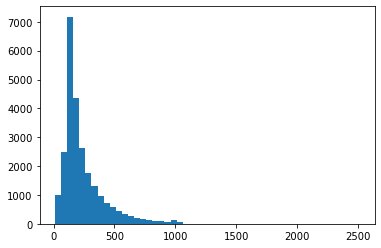

In [8]:
import matplotlib.pyplot as plt
import numpy as np

length_list = [int(len(comment)) for comment in x_train]
print(np.mean(length_list))
plt.hist(length_list, bins=range(min(length_list), max(length_list)+50, 50))
plt.show()

In [17]:
from tensorflow.keras.preprocessing import sequence 

(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data()
maxword = 400
x_train = sequence.pad_sequences(x_train, maxlen=maxword)
x_test = sequence.pad_sequences(x_test, maxlen=maxword)

vocab_size = np.max([np.max(comment) for comment in x_train]) + 1
print("vocab_size",vocab_size)

vocab_size 88587


In [20]:
from tensorflow.keras import layers, models, optimizers
import tensorflow as tf

model = models.Sequential(name="imdb_model")
model.add(tf.keras.Input(shape=(maxword,), name="inputs"))
model.add(layers.Embedding(input_dim=vocab_size, output_dim=64, name="embedding"))
model.add(layers.Flatten(name="flatten"))
model.add(layers.Dense(units=500, activation="relu", name="dense_1"))
model.add(layers.Dense(units=maxword, activation="relu", name="dense_2"))
model.add(layers.Dense(units=(maxword//2), activation="relu", name="dense_3"))
model.add(layers.Dense(units=50, activation="relu", name="dense_4"))
model.add(layers.Dense(units=1, activation="sigmoid", name="outputs"))

optimizer = optimizers.Adam(lr=0.01)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 64)           5669568   
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               12800500  
_________________________________________________________________
dense_2 (Dense)              (None, 400)               200400    
_________________________________________________________________
dense_3 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                10050     
_________________________________________________________________
outputs (Dense)              (None, 1)                

In [21]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=6,batch_size=128, verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/6
25000/25000 [==============================] - 51s 2ms/sample - loss: 0.4375 - accuracy: 0.8008 - val_loss: 0.3050 - val_accuracy: 0.8736
Epoch 2/6
25000/25000 [==============================] - 50s 2ms/sample - loss: 0.0897 - accuracy: 0.9703 - val_loss: 0.3852 - val_accuracy: 0.8584
Epoch 3/6
25000/25000 [==============================] - 50s 2ms/sample - loss: 0.0139 - accuracy: 0.9964 - val_loss: 1.1479 - val_accuracy: 0.8370
Epoch 4/6
25000/25000 [==============================] - 50s 2ms/sample - loss: 0.8697 - accuracy: 0.8104 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/6
25000/25000 [==============================] - 51s 2ms/sample - loss: 0.6933 - accuracy: 0.5026 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/6
25000/25000 [==============================] - 50s 2ms/sample - loss: 0.6933 - accuracy: 0.4975 - val_loss: 0.6932 - val_accuracy: 0.5000


In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

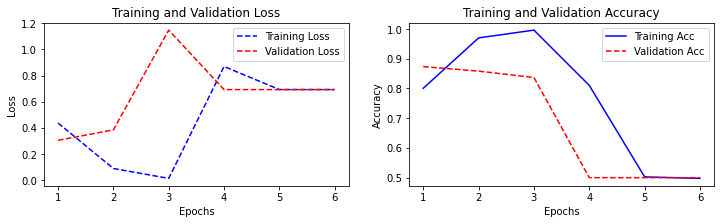

In [23]:
def visual_train_status(history):
        plt.figure(figsize=(12,3))
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        epochs = range(1, len(loss)+1)  
        plt.subplot(1,2,1)
        plt.plot(epochs, loss, "b--", label="Training Loss")
        plt.plot(epochs, val_loss, "r--", label="Validation Loss")
        plt.title("Training and Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        
        # 顯示訓練和驗證準確度
        acc = history.history["accuracy"]
        val_acc = history.history["val_accuracy"]
        epochs = range(1, len(acc)+1)
        plt.subplot(1,2,2)
        plt.plot(epochs, acc, "b-", label="Training Acc")
        plt.plot(epochs, val_acc, "r--", label="Validation Acc")
        plt.title("Training and Validation Accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()
        
visual_train_status(history)

In [26]:
score = model.evaluate(x_test, y_test, verbose=0)
print("score",score)

score [0.6932240420913697, 0.5]


## Conv1D

In [30]:
model = models.Sequential(name="conv1D_model")
model.add(tf.keras.Input(shape=(maxword,), name="inputs"))
model.add(layers.Embedding(input_dim=vocab_size, output_dim=64, name="embedding"))
model.add(layers.Conv1D(filters=64, kernel_size=3, padding="same", activation="relu", name="conv_1"))
model.add(layers.MaxPooling1D(pool_size=2, name="pool_1"))
model.add(layers.Dropout(rate=0.3, name="drop_1"))
model.add(layers.Conv1D(filters=128, kernel_size=3, padding="same", activation="relu", name="conv_2"))
model.add(layers.MaxPooling1D(pool_size=2, name="pool_2"))
model.add(layers.Dropout(rate=0.3, name="drop_2"))
model.add(layers.Flatten(name="flatten"))
model.add(layers.Dense(units=64, activation="relu", name="dense_1"))
model.add(layers.Dense(units=32, activation="relu", name="dense_2"))
model.add(layers.Dense(units=1, activation="sigmoid", name="outputs"))

model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
model.summary()

Model: "conv1D_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 64)           5669568   
_________________________________________________________________
conv_1 (Conv1D)              (None, 400, 64)           12352     
_________________________________________________________________
pool_1 (MaxPooling1D)        (None, 200, 64)           0         
_________________________________________________________________
drop_1 (Dropout)             (None, 200, 64)           0         
_________________________________________________________________
conv_2 (Conv1D)              (None, 200, 128)          24704     
_________________________________________________________________
pool_2 (MaxPooling1D)        (None, 100, 128)          0         
_________________________________________________________________
drop_2 (Dropout)             (None, 100, 128)         

In [31]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=6, batch_size=128, verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/6
25000/25000 [==============================] - 54s 2ms/sample - loss: 0.4990 - accuracy: 0.7219 - val_loss: 0.3076 - val_accuracy: 0.8639
Epoch 2/6
25000/25000 [==============================] - 55s 2ms/sample - loss: 0.2255 - accuracy: 0.9110 - val_loss: 0.2655 - val_accuracy: 0.8917
Epoch 3/6
25000/25000 [==============================] - 50s 2ms/sample - loss: 0.1509 - accuracy: 0.9437 - val_loss: 0.3081 - val_accuracy: 0.8861
Epoch 4/6
25000/25000 [==============================] - 51s 2ms/sample - loss: 0.1017 - accuracy: 0.9638 - val_loss: 0.4269 - val_accuracy: 0.8514
Epoch 5/6
25000/25000 [==============================] - 51s 2ms/sample - loss: 0.0726 - accuracy: 0.9752 - val_loss: 0.4192 - val_accuracy: 0.8616
Epoch 6/6
25000/25000 [==============================] - 51s 2ms/sample - loss: 0.0483 - accuracy: 0.9836 - val_loss: 0.4817 - val_accuracy: 0.8642


In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

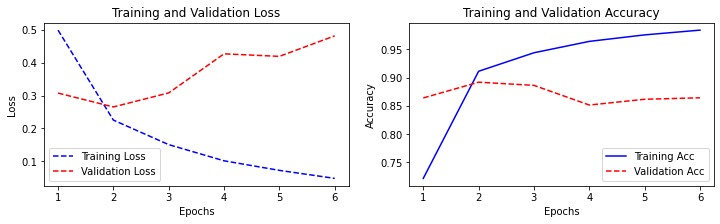

In [33]:
visual_train_status(history)

In [35]:
scores = model.evaluate(x_test, y_test, verbose=2)
print(scores)

25000/1 - 16s - loss: 0.7289 - accuracy: 0.8642
[0.4816595212101936, 0.8642]


# LSTM

In [37]:
model = models.Sequential(name="lstm_model")
model.add(tf.keras.Input(shape=(maxword,), name="inputs"))
model.add(layers.Embedding(input_dim=vocab_size, output_dim=64, name="embedding"))
model.add(layers.LSTM(units=128, return_sequences=True, name="lstm_1"))
model.add(layers.Dropout(rate=0.3, name="drop_1"))
model.add(layers.LSTM(units=64, return_sequences=True, name="lstm_2"))
model.add(layers.Dropout(rate=0.3, name="drop_2"))
model.add(layers.LSTM(units=32, name="lstm_3"))
model.add(layers.Dropout(rate=0.3, name="drop_3"))
model.add(layers.Dense(1, activation="sigmoid", name="outputs"))

model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
model.summary()

Model: "lstm_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 64)           5669568   
_________________________________________________________________
lstm_1 (LSTM)                (None, 400, 128)          98816     
_________________________________________________________________
drop_1 (Dropout)             (None, 400, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 400, 64)           49408     
_________________________________________________________________
drop_2 (Dropout)             (None, 400, 64)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
drop_3 (Dropout)             (None, 32)                0

In [40]:
test_num = len(x_test) // 100
x_test = x_test[:test_num]
y_test = y_test[:test_num]
train_num = len(x_train) // 10
x_train = x_train[:train_num]
y_train = y_train[:train_num]
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=4, batch_size=128, verbose=1)

Train on 2500 samples, validate on 250 samples
Epoch 1/4
2500/2500 [==============================] - 181s 72ms/sample - loss: 0.5987 - accuracy: 0.7092 - val_loss: 0.4847 - val_accuracy: 0.7680
Epoch 2/4
2500/2500 [==============================] - 181s 72ms/sample - loss: 0.4255 - accuracy: 0.8256 - val_loss: 0.4009 - val_accuracy: 0.8360
Epoch 3/4
2500/2500 [==============================] - 184s 74ms/sample - loss: 0.2499 - accuracy: 0.9100 - val_loss: 0.4073 - val_accuracy: 0.8200
Epoch 4/4
2500/2500 [==============================] - 184s 73ms/sample - loss: 0.1208 - accuracy: 0.9628 - val_loss: 0.6779 - val_accuracy: 0.7520


In [41]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

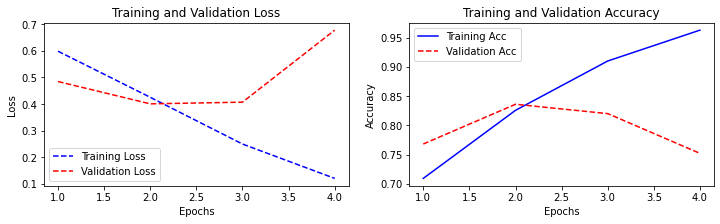

In [42]:
visual_train_status(history)

In [43]:
scores = model.evaluate(x_test, y_test, verbose=2)
print(scores)

250/1 - 2s - loss: 0.5350 - accuracy: 0.7520
[0.6779489743709565, 0.752]
